## Contexte du projet


Contexte du projet
Vous ne révez plus... vous venez de faire le plein de ressources... Aujourd'hui vous allez créer votre premier labyrinthe !!
Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. Il existe un point d’entrée et aussi une issue qu’il convient d’atteindre, cette dernière pouvant être confondue avec le point d’entrée. On peut aussi placer en un certain endroit un objet qu’il s’agit d’atteindre. Dans tous les cas, on doit trouver un moyen d’explorer le labyrinthe en passant partout de façon systématique, du moins jusqu’à l’issue finale, en évitant de refaire plusieurs fois le même chemin ou de tourner en rond. Pour s’en sortir, on connaît le fil d’Ariane, les cailloux disposés sur son chemin par le Petit Poucet, ou la stratégie qui consiste à toujours longer les murs que l’on a à sa droite (ou à sa gauche si l’on préfère). Mais tout cela demande à être précisé.

Le but de ce projet est de créer un code python qui va générer aléatoirement des grilles de labyrinthe, qui va être capable de trouver la solution de celles-ci, si elle existe (eh oui, il se peut qu'un labyrinthe soit insoluble!), et qui pourra afficher tout ça sous la forme d’une image !

On a appris à parcourir un arbre, en choisissant par exemple d’aller à droite lorsque plusieurs bifurcations se présentent, et en faisant demi-tour lorsqu’on atteint une feuille de l’arbre. Pour résoudre un labyrinthe, l’approche est similaire. Pour cela considérons un objet mobile en forme de carré, caractérisé par sa position (x, y) et dirigé dans une certaine direction, celle qu’il a devant lui. A partir de cette direction, l’objet mobile peut soit garder cette direction, soit faire un quart de tour à droite, soit faire un quart de tour à gauche, soit faire demi-tour. Pour respecter les conditions de l’exploration, il va privilégier de tourner à droite, mais s’il tombe sur un mur, il choisira d’aller devant, et s’il tombe encore sur un mur, il ira à gauche. Enfin, s’il tombe sur un cul-de-sac, il fera demi-tour.

« Dans le labyrinthe, tu ne te perds pas... tu te retrouves »

## Livrables 

Créer une application permettant de générer de manière aléatoire un labyrinthe (l’utilisateur pourra décider de la taille du labyrinthe généré, par exemple 10x10 ou 50x100) et permettant également de résoudre le labyrinthe.

In [1]:
import random
import matplotlib.pyplot as plt
import sys

In [2]:
class Labyrinthe:
    def __init__(self, width, height):
        self.width=width
        self.height=height
        self.cells=[]
        zone=0
        num_cells=0
        #construction des cellules fermées et de la liste des zones initiales
        #origine en haut à gauche
        for i in range(height):
            self.cells.append([])
            for j in range(width):
                #chaque cell est entièrement fermée
                #False = on passe pas = mur fermé ; True = on peut passer = mur ouvert
                self.cells[i].append({'N':False, 'E':False, 'S':False, 'W':False, 'zone':zone, 'num_cells':num_cells})#chaque zone est unique au départ zone=i*width+j
                zone+=1
                num_cells+=1
        self.n_zones=width*height
        self.generer()


    def fusionner(self, i1, j1, dir):
        #i2,j2 et dir2 sont associés à la case de la direction opposée
        if dir=='N':
            i2=i1-1;j2=j1;dir2='S'
        elif dir=='S':
            i2=i1+1;j2=j1;dir2='N'
        elif dir=='W':
            i2=i1;j2=j1-1;dir2='E'
        elif dir=='E':
            i2=i1;j2=j1+1;dir2='W'

        if(i2>=0 and i2<self.height and j2>=0 and j2<self.width):
            zone1=self.cells[i1][j1]['zone']
            zone2=self.cells[i2][j2]['zone']
            if zone1!=zone2:
                self.cells[i1][j1][dir]=True
                self.cells[i2][j2][dir2]=True
                #fusion des zones :
                for i in range(self.height):
                    for j in range(self.width):
                        if self.cells[i][j]['zone']==zone2:
                            self.cells[i][j]['zone']=zone1
                self.n_zones-=1;#permettra de s'arrêter sans vider toute la pile
                return zone1
        return False


    def generer(self):
        #cells à traiter
        pile_cells=[]
        for dir in ['N', 'E', 'S', 'W']:
            for i in range(self.height):
                for j in range(self.width):
                    pile_cells.append((i,j,dir))
        random.shuffle(pile_cells)                      ######### Mélange des cartes...
        #print(pile_cells)
        while(len(pile_cells)>0 and self.n_zones>1):
            (i,j,dir)=pile_cells.pop()
            self.fusionner(i,j,dir)
            #décommenter ci-dessous pour visualiser les étapes :
            self.print(True)
        #print(self.cells)
        return self.cells

    def print_plot(self):
        print(self.cells) #********************************************
        for i in range(self.height):
            y=self.height - i
            color="b"
            for j in range(self.width):
                x=j
                for dir in ['N', 'E', 'S', 'W' ]:
                    if not self.cells[i][j]['N']:
                        plt.plot([x,x+1], [y+1,y+1], color)
                    if not self.cells[i][j]['E']:
                        plt.plot([x+1,x+1], [y,y+1],color)
                    if not self.cells[i][j]['S']:
                        plt.plot([x,x+1], [y,y],color)
                    if not  self.cells[i][j]['W']:
                        #print("plot gauche")
                        plt.plot([x,x], [y,y+1],color)
        plt.show()

    #labels peut prendre 3 formes :
    #True : imprime les zones de la méthode générer
    #tableau T de taille height par width où T[i][j] est la valeur affichée dans la cellule (i,j)
    def print(self, labels=False):
        from math import floor
        #alias :
        w=self.width;h=self.height;c=self.cells;
        #si on imprime les labels, il faut élargir la taille des couloirs
        if(labels==True):
            labels=[ [ c[i][j]['zone'] for i in range(h) ] for j in range(w) ]

        if(labels):
            len_lbl=max([ max([ len(str(labels[i][j])) for i in range(h) ]) for j in range(w) ])+1
        inters=[' ','╴','╷', '┐','╶','─','┌','┬','╵','┘','│','┤','└','┴','├','┼']
        t=""
        #la grille des intersections de cases est de taille (N+1)(M+1)
        for i in range(h+1):
            interligne=""
            for j in range(w+1):
                #up, right, bottom, left : les 4 parties de la croix "┼" #False = mur, True = pas mur
                #Coins et bords:
                up=False if i==0 else None
                left=False if j==0 else None
                right=False if j==w else None
                bottom=False if i==h else None
                if j==w:
                    if up==None:up=not c[i-1][j-1]['E']
                    if bottom==None:bottom=not c[i][j-1]['E']
                if i==h:
                    bottom=False
                    if right==None:right=not c[i-1][j]['S']
                    if left==None:left=not c[i-1][j-1]['S']
                #intérieur :
                if up==None:up=not c[i-1][j]['W']
                if right==None:right=not c[i][j]['N']
                if bottom==None:bottom=not c[i][j]['W']
                if left==None:left=not c[i][j-1]['N']
                #-> mot binaire à 4 bits. 16 cas qu'on a mis dans l'ordre dans la liste inters
                #indice inters
                k=-up*8+right*4+bottom*2+left
                if not labels:
                    #espacement horizontal supplémentaire
                    sep= "─" if left else " "
                    t+=sep+inters[k]
                    if j==self.width:t+="\n"
                else:
                    sep= (len_lbl+2)*"─" if right else (len_lbl+2)*" "


                    lbl=labels[i][j] if i<self.height and j<self.width else ""

                    len_sp_left=floor((len_lbl - len(str(lbl)))/2)
                    len_sp_right=len_lbl-len(str(lbl))-len_sp_left
                    txt_lbl=str(lbl)
                    interligne+=("│" if bottom else " ")+" "*(len_sp_left+1)+txt_lbl+" "*(len_sp_right+1)
                    t+=inters[k]+sep
                    if j==self.width:
                        t+="\n" + interligne + "\n"
        print(t)

┌────┬────┬────┐    
│ 0  │ 3  │ 6  │    
├────┼────┼────┤    
│ 1  │ 4  │ 6  │    
├────┴────┼────┤    
│ 2    5  │ 8  │    
└─────────┴────┘    
                    

┌────┬────┬────┐    
│ 0  │ 3  │ 6  │    
├────┼────┴────┤    
│ 1  │ 5    6  │    
├────┴────┬────┤    
│ 2    5  │ 8  │    
└─────────┴────┘    
                    

┌────┬────┬────┐    
│ 3  │ 3  │ 6  │    
│    ├────┴────┤    
│ 1  │ 5    6  │    
├────┴────┬────┤    
│ 2    5  │ 8  │    
└─────────┴────┘    
                    

┌────┬────┬────┐    
│ 3  │ 3  │ 6  │    
│    ├────┴────┤    
│ 1  │ 5    6  │    
├────┴────┐    │    
│ 2    5  │ 5  │    
└─────────┴────┘    
                    

┌────┬─────────┐    
│ 3  │ 3    6  │    
│    ├─────────┤    
│ 2  │ 5    6  │    
├────┴────┐    │    
│ 2    5  │ 5  │    
└─────────┴────┘    
                    

┌────┬─────────┐    
│ 3  │ 3    6  │    
│    ├─────────┤    
│ 2  │ 5    6  │    
├────┴────┐    │    
│ 2    5  │ 5  │    
└─────────┴────┘    
        

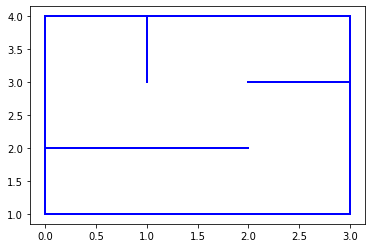

In [4]:
n=3

laby = Labyrinthe(n,n)
#laby.print()
#laby.print(True)
laby.print_plot()
G = laby.generer()
#print(G)